<a href="https://colab.research.google.com/github/arunsingh22/CaseStudies/blob/master/Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from tqdm import tqdm
from collections import Counter
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/My Drive/preprocessed_data.csv",nrows=50000)
data.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')

In [ ]:
y = data["project_is_approved"].values
print(data.project_is_approved.value_counts())
print("Remark : Data is highly imbalance")

#Dropping the project approved column from data
X = data.drop(["project_is_approved"],axis=1)

1    41993
0     8007
Name: project_is_approved, dtype: int64
Remark : Data is highly imbalance


In [ ]:
#Splitting the data into train,CV,test.
train_data,test_data,train_label,test_label = train_test_split(X,y,test_size = 0.3,stratify =y)

print("*"*80)
print("Train dataset: ",train_data.shape)
print("Test dataset: ",test_data.shape)
print("*"*80)

print(Counter(train_label))

********************************************************************************
Train dataset:  (35000, 8)
Test dataset:  (15000, 8)
********************************************************************************
Counter({1: 29395, 0: 5605})


####**Importing Project title and encoding**

In [ ]:
project= pd.read_csv("/content/drive/My Drive/Assignment_2/train_data.csv",nrows=50000)
project_title = project["project_title"].values #extracting the project title from the entire file

#Credits: https://colab.research.google.com/drive/1nUiNc5Cb38nTLjUopfNKgPL6g9jZmPY7#scrollTo=d6RCdphRCyn0
print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
import re
def decontracted(phrase):
  
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

processed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_title):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split())
    processed_project_title.append(sent.lower().strip())
project_title = processed_project_title
print()
print(project_title)
print()
project_title = pd.Series(project_title) # changing the dtype of project_title
train_project_title,test_project_title = train_test_split(project_title,test_size =0.3)

 15%|█▌        | 7726/50000 [00:00<00:00, 77254.73it/s]

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


100%|██████████| 50000/50000 [00:00<00:00, 75044.17it/s]


['educational support for english learners at home', 'wanted projector for hungry learners', 'soccer equipment for awesome middle school students', 'techie kindergarteners', 'interactive math tools', 'flexible seating for mrs jarvis terrific third graders', 'chromebooks for special education reading program', 'it is the 21st century', 'targeting more success in class', 'just for the love of reading pure pleasure', 'reading changes lives', 'elevating academics and parent rapports through technology', 'building life science experiences', 'everyone deserves to be heard', 'tablets can show us the world', 'making recess active', 'making great leap is with leapfrog', 'technology teaches tomorrow is talents today', 'test time', 'wiggling our way to success', 'magic carpet ride in our library', 'from sitting to standing in the classroom', 'books for budding intellectuals', 'instrumental power conquering steam', 's t e a m challenges science technology engineering art math', 'math masters', 't

##**SET 1: Using Bag of Words for featurization**

SET 1: 

In [ ]:
#Credits: https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=jYm1BGtSPSxF&forceEdit=true&sandboxMode=true
# Taking all categorical features together - ENCODING USING THE BOW (ESSAY) 

# Encoding essay into onehot encoding using Countvectorizer/BOW
vect = CountVectorizer(ngram_range=(1,2),min_df=10,max_features=5000)               
BOW_Train_essay = vect.fit_transform(train_data["essay"].values)
# print(vect.vocabulary_)

#BOW for test data
BOW_test_essay = vect.transform(test_data["essay"].values)
print()
print("BOW_Train_essay: ",BOW_Train_essay.shape)
print("BOW_test_essay: ",BOW_test_essay.shape)
print()

#BOW encoding of the project Title:
vect = CountVectorizer()
BOW_Train_project_title = vect.fit_transform(train_project_title)
BOW_Test_project_title = vect.transform(test_project_title)  # Test data encoded
print("BOW_Train_project_title: ",BOW_Train_project_title.shape)
print("BOW_Test_project_title: ",BOW_Test_project_title.shape)
print()

#Encoding the categorical features School state
vect = CountVectorizer()
train_school_state_OHE = vect.fit_transform(train_data.school_state.values)
#OHE for test data
test_school_state_OHE = vect.transform(test_data["school_state"].values)
print("train_school_state_OHE:",train_school_state_OHE.shape)
print("test_school_state_OHE:",test_school_state_OHE.shape)  # Test data encoded
print()

#Encoding the categorical features teacher prefix
vect = CountVectorizer()
train_teacher_prefix_OHE = vect.fit_transform(train_data.teacher_prefix.values)
test_teacher_prefix_OHE = vect.transform(test_data["teacher_prefix"].values) # Test data encoded
print("train_teacher_prefix_OHE: ",train_teacher_prefix_OHE.shape)
print("test_teacher_prefix_OHE:",test_teacher_prefix_OHE.shape)
print()

#Encoding the categorical features project_grade_category
vect = CountVectorizer()
train_project_grade_category_OHE = vect.fit_transform(train_data.project_grade_category.values)
test_project_grade_category_OHE = vect.transform(test_data["project_grade_category"].values) # Test data encoded
print("train_project_grade_category_OHE: ",train_project_grade_category_OHE.shape)
print("test_project_grade_category_OHE: ",test_project_grade_category_OHE.shape)
print()

#Encoding the categorical features clean_categories	
vect = CountVectorizer()
train_clean_categories_OHE = vect.fit_transform(train_data.clean_categories.values)
test_clean_categories_OHE = vect.transform(test_data["clean_categories"].values)# Test data encoded
print("train_clean_categories_OHE:",train_clean_categories_OHE.shape)
print("test_clean_categories_OHE:",test_clean_categories_OHE.shape)
print()

#Encoding the categorical features clean_subcategories	
vect = CountVectorizer()
train_clean_subcategories_OHE = vect.fit_transform(train_data.clean_subcategories.values)
test_clean_subcategories_OHE = vect.transform(test_data["clean_subcategories"].values)
print("train_clean_subcategories_OHE:",train_clean_subcategories_OHE.shape)
print("test_clean_subcategories_OHE:",test_clean_subcategories_OHE.shape)
print()


BOW_Train_essay:  (35000, 5000)
BOW_test_essay:  (15000, 5000)

BOW_Train_project_title:  (35000, 9959)
BOW_Test_project_title:  (15000, 9959)

train_school_state_OHE: (35000, 51)
test_school_state_OHE: (15000, 51)

train_teacher_prefix_OHE:  (35000, 5)
test_teacher_prefix_OHE: (15000, 5)

train_project_grade_category_OHE:  (35000, 4)
test_project_grade_category_OHE:  (15000, 4)

train_clean_categories_OHE: (35000, 7)
test_clean_categories_OHE: (15000, 7)

train_clean_subcategories_OHE: (35000, 28)
test_clean_subcategories_OHE: (15000, 28)



###**Encoding Numerical Features : Price**

In [ ]:
#Credits :https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=rNl4cZNlPSxK&forceEdit=true&sandboxMode=true 
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
train_norm_price = normalizer.fit_transform(train_data['price'].values.reshape(-1,1))
X_test_norm_price = normalizer.transform(test_data['price'].values.reshape(-1,1))
print("train_norm_price: ",train_norm_price.shape)
print("X_test_norm_price: ",X_test_norm_price.shape)
print()

normalizer = StandardScaler()
train_norm_prev_posted_proj = normalizer.fit_transform(train_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_norm_prev_posted_proj = normalizer.transform(test_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print("train_norm_prev_posted_proj",train_norm_prev_posted_proj.shape)
print("X_test_norm_prev_posted_proj",X_test_norm_prev_posted_proj.shape)
print()


train_norm_price:  (35000, 1)
X_test_norm_price:  (15000, 1)

train_norm_prev_posted_proj (35000, 1)
X_test_norm_prev_posted_proj (15000, 1)



###**Putting all the features togther using hstack with BOW representation**

In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_train = hstack((BOW_Train_essay,BOW_Train_project_title,train_school_state_OHE,train_teacher_prefix_OHE,train_project_grade_category_OHE,
                  train_clean_categories_OHE,train_clean_subcategories_OHE,train_norm_price,train_norm_prev_posted_proj)).tocsr()

X_test = hstack((BOW_test_essay,BOW_Test_project_title,test_school_state_OHE,test_teacher_prefix_OHE,test_project_grade_category_OHE,
                 test_clean_categories_OHE,test_clean_subcategories_OHE,X_test_norm_price,X_test_norm_prev_posted_proj,
                 )).tocsr()

print()
print("X_train: ",X_train.shape)
print("X_test:",X_test.shape)


X_train:  (35000, 15056)
X_test: (15000, 15056)


**Conclusion: Balancing the dataset leads to poor performance because lots of artificial points get generated and get missclassified**

In [ ]:
#Balancing the dataset
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

print("Before bal train_data.shape: ",X_train.shape,Counter(train_label))
rnd = RandomOverSampler()
X_train,train_label =rnd.fit_sample(X_train,train_label)
print("After bal train_data.shape:{0},{1} ",train_BOW.shape,Counter(train_label_BOW))

Before bal train_data.shape:  (35000, 15056) Counter({1: 29395, 0: 5605})
After bal train_data.shape:{0},{1}  (52911, 14967) Counter({1: 29395, 0: 23516})


### **SGDClassifier on SET 1**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

alpha_val = [10**x for x in range(-4,5)] #list comperhesion
print(alpha_val)
#Logistic Regression 
params= {"alpha":alpha_val,
         "penalty":['l1','l2'],
         "loss":["log"],
        }
clf = SGDClassifier(class_weight="balanced")
model = GridSearchCV(clf,param_grid=params,verbose=1,return_train_score=True,scoring="roc_auc",cv=3,n_jobs=-1)
model.fit(X_train,train_label)
print()
#print the best hyperparameter
print("Models best parameters:",model.best_params_)

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  2.3min finished



Models best parameters: {'alpha': 0.0001, 'loss': 'log', 'penalty': 'l2'}


In [ ]:
# #Ploting the AUC curve to find the best Alpha
from sklearn.metrics import accuracy_score,confusion_matrix
# results = pd.DataFrame.from_dict(model.cv_results_)
# results = results.sort_values(['param_alpha'])

# train_auc= results['mean_train_score']
# train_auc_std= results['std_train_score']
# cv_auc = results['mean_test_score'] 
# cv_auc_std= results['std_test_score']
# alpha = results['param_alpha']

# fig, ax = plt.subplots()
# ax.plot(alpha, train_auc, label='Train AUC')
# ax.plot(alpha, cv_auc, label='CV AUC')

# ax.scatter(alpha, train_auc, label='Train AUC points')
# ax.scatter(alpha, cv_auc, label='CV AUC points')
# ax.set_xscale('log')
# ax.set_xticks([10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10** 4])
# ax.set_xlabel("Alpha value ")
# ax.set_ylabel("Mean Test Score")
# ax.set_title("Alpha Vs Mean test score using L2 regularization ")
# ax.grid()
# ax.legend()

x_predict = model.predict(X_train)
# print(accuracy_score(X_train,train_label))
# print()
print("Training Confusion Matrix:")
print(confusion_matrix(train_label,x_predict))
print()

Training Confusion Matrix:
[[28346  1049]
 [ 9410 19985]]



**Test Data**

Test Accuracy: 0.7037333333333333

Test Confusion Matrix:
[[1145 1257]
 [3187 9411]]



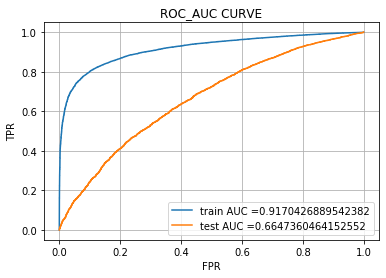

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import  roc_curve,auc

model = SGDClassifier(alpha=0.0001,class_weight="balanced",loss='log',random_state=5,penalty='l2')
clf = CalibratedClassifierCV(model,cv=3)
clf.fit(X_train,train_label)
y_predict =  clf.predict(X_test)
print("Test Accuracy:",accuracy_score(test_label,y_predict))
print()
print("Test Confusion Matrix:")
print(confusion_matrix(test_label,y_predict))
print()

y_train_pred = clf.predict_proba(X_train)    
y_test_pred = clf.predict_proba(X_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(train_label, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(test_label, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel('FPR')
plt.ylabel("TPR")
plt.title("ROC_AUC CURVE")
plt.grid()
plt.show()

## **SET 2: Using TFIDF for featurization**

In [ ]:
# Encoding essay into onehot encoding using Tfidf
vect = TfidfVectorizer(ngram_range=(1,2),min_df=10,max_features=5000)               
TFidf_Train_essay = vect.fit_transform(train_data["essay"].values)
TFidf_test_essay = vect.transform(test_data["essay"].values) #Tfidf for test data
print()
print("TFidf_Train_essay: ",TFidf_Train_essay.shape)
print("TFidf_test_essay: ",TFidf_test_essay.shape)
print()

#TFidf encoding of the project Title:
vect = TfidfVectorizer()
TFidf_Train_project_title = vect.fit_transform(train_project_title)
TFidf_Test_project_title = vect.transform(test_project_title)  # Test data encoded
print("TFidf_Train_project_title: ",TFidf_Train_project_title.shape)
print("TFidf_Test_project_title: ",TFidf_Test_project_title.shape)
print()


TFidf_Train_essay:  (35000, 5000)
TFidf_test_essay:  (15000, 5000)

TFidf_Train_project_title:  (35000, 9959)
TFidf_Test_project_title:  (15000, 9959)



###**Putting all the features togther using hstack with TFidf representation**

In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_train = hstack((TFidf_Train_essay,TFidf_Train_project_title,train_school_state_OHE,train_teacher_prefix_OHE,train_project_grade_category_OHE,
                  train_clean_categories_OHE, train_clean_subcategories_OHE,train_norm_price,train_norm_prev_posted_proj)).tocsr()

X_test = hstack((TFidf_test_essay,TFidf_Test_project_title,test_school_state_OHE,test_teacher_prefix_OHE,test_project_grade_category_OHE,
                 test_clean_categories_OHE,test_clean_subcategories_OHE,X_test_norm_price,X_test_norm_prev_posted_proj,)).tocsr()

print()
print("X_train: ",X_train.shape)
print("X_test:",X_test.shape)


X_train:  (35000, 14950)
X_test: (15000, 14950)


### **SGDClassifier on SET 2**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

alpha_val = [10**x for x in range(-4,5)] #list comperhesion
print(alpha_val)
#Logistic Regression 
params= {"alpha":alpha_val,
          "loss":["log"],
         "penalty":["l1","l2"]
        }
clf = SGDClassifier(class_weight="balanced",n_jobs=-1)
model = GridSearchCV(clf,param_grid=params,verbose=1,return_train_score=True,scoring="roc_auc",)
model.fit(X_train,train_label)
print()
#print the best hyperparameter
print("Models best hyper parameters",model.best_params_)

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:   19.8s finished



Models best hyper parameters {'alpha': 0.0001, 'loss': 'log', 'penalty': 'l1'}


{'alpha': 0.0001, 'loss': 'log', 'penalty': 'l1'}

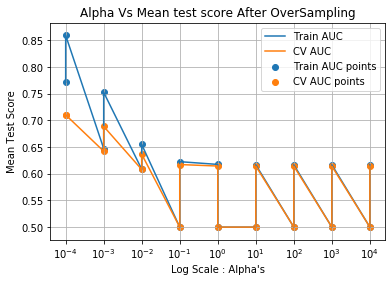

In [ ]:
#Ploting the AUC curve to find the best Alpha
results = pd.DataFrame.from_dict(model.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha = results['param_alpha']

fig, ax = plt.subplots()
ax.plot(alpha, train_auc, label='Train AUC')
ax.plot(alpha, cv_auc, label='CV AUC')

ax.scatter(alpha, train_auc, label='Train AUC points')
ax.scatter(alpha, cv_auc, label='CV AUC points')
ax.set_xscale('log')
ax.set_xticks([10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10** 4])
ax.set_xlabel("Alpha value ")
ax.set_ylabel("Mean Test Score")
ax.set_title("Alpha Vs Mean test score using L1 regulariztion")
ax.grid()
ax.legend()


0.8389333333333333

[[   17  2385]
 [   31 12567]]



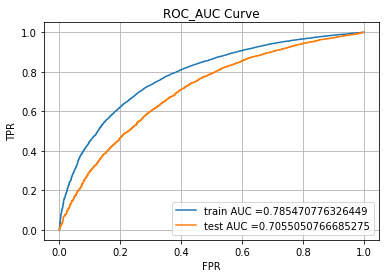

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import  roc_curve,auc

model = SGDClassifier(alpha=0.0001,class_weight="balanced",loss='log',random_state=5,penalty="l1")
clf= CalibratedClassifierCV(model,cv=3)
clf.fit(X_train,train_label)
y_predict = clf.predict(X_test)
print(accuracy_score(test_label,y_predict))
print()
print(confusion_matrix(test_label,y_predict))
print()

y_train_pred = clf.predict_proba(X_train)    
y_test_pred = clf.predict_proba(X_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(train_label, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(test_label, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC Curve")
plt.grid()
plt.show()

## **SET 3: Using Avg Word2Vec**

In [ ]:
# Credits:https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=ka6B7i6vPSx3
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
import pickle
with open('/content/drive/My Drive/Assignment_2/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [ ]:
#Credits:https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=ka6B7i6vPSx3
#compute average word2vec for each train_project_title
avg_w2v_train_project_title = []; 
for sentence in tqdm(train_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_train_project_title.append(vector)

# compute average word2vec for each test_project_title
avg_w2v_test_project_title = []; 
for sentence in tqdm(test_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_test_project_title.append(vector)


100%|██████████| 15000/15000 [00:00<00:00, 59513.93it/s]


In [ ]:
#Credits:https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=ka6B7i6vPSx3
#compute average word2vec for each train_essay
avg_w2v_train_essay= []; 
for sentence in tqdm(train_data["essay"].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_train_essay.append(vector)

# compute average word2vec for each test_essay
avg_w2v_test_essay = []; 
for sentence in tqdm(test_data["essay"].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_test_essay.append(vector)
# train_project_title
# CV_project_title
# test_project_title


100%|██████████| 15000/15000 [00:04<00:00, 3328.22it/s]


In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train = hstack((avg_w2v_train_essay,avg_w2v_train_project_title,train_school_state_OHE,train_teacher_prefix_OHE,train_project_grade_category_OHE,train_clean_categories_OHE,
                  train_clean_subcategories_OHE,train_norm_price,train_norm_prev_posted_proj)).tocsr()

X_test = hstack((avg_w2v_test_essay,avg_w2v_test_project_title,test_school_state_OHE,test_teacher_prefix_OHE,test_project_grade_category_OHE,test_clean_categories_OHE,
                 test_clean_subcategories_OHE,X_test_norm_price, X_test_norm_prev_posted_proj)).tocsr()

print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)

X_train:  (35000, 701)
X_test:  (15000, 701)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

alpha_val = [10**x for x in range(-4,5)]
print(alpha_val)
#Logistic Regression 
params= {"alpha":alpha_val,
         "penalty":["l1","l2"],          
         "loss":["log"],
        }
clf = SGDClassifier(class_weight="balanced",n_jobs=-1)
model = GridSearchCV(clf,param_grid=params,verbose=1,return_train_score=True,scoring="roc_auc")
model.fit(X_train,train_label)


[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  1.7min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=-1,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000],
                         'loss'

{'alpha': 0.0001, 'loss': 'log', 'penalty': 'l2'}

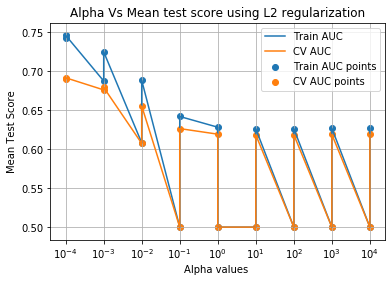

In [ ]:
#Ploting the AUC curve to find the best Alpha
results = pd.DataFrame.from_dict(model.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha = results['param_alpha']

fig, ax = plt.subplots()
ax.plot(alpha, train_auc, label='Train AUC')
ax.plot(alpha, cv_auc, label='CV AUC')

ax.scatter(alpha, train_auc, label='Train AUC points')
ax.scatter(alpha, cv_auc, label='CV AUC points')
ax.set_xscale('log')
ax.set_xticks([10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10** 4])
ax.set_xlabel("Alpha values ")
ax.set_ylabel("Mean Test Score")
ax.set_title("Alpha Vs Mean test score using L2 regularization")
ax.grid()
ax.legend()

#print the best hyperparameter
model.best_params_

**Test Dataset**

Accuracy: 0.8386666666666667

Confusion Matrix:
[[   21  2381]
 [   39 12559]]



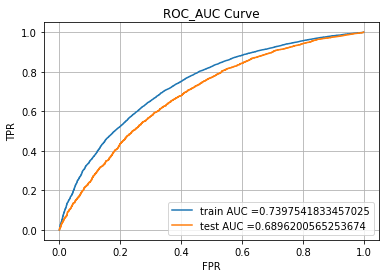

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import  roc_curve,auc

model = SGDClassifier(alpha=0.0001,class_weight="balanced",loss='log',random_state=5,penalty="l2")
clf = CalibratedClassifierCV(model,cv=3)
clf.fit(X_train,train_label)
y_predict =  clf.predict(X_test)
print("Accuracy:",accuracy_score(test_label,y_predict))
print()
print("Confusion Matrix:")
print(confusion_matrix(test_label,y_predict))
print()

#For printing the AUC-ROC curve.
y_train_pred = clf.predict_proba(X_train)    
y_test_pred = clf.predict_proba(X_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(train_label, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(test_label, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC Curve")
plt.grid()
plt.show()

## **SET 4 : Using Tf-idf Word2Vec model for encoding the essay data.**

In [ ]:
import pickle
with open('/content/drive/My Drive/Assignment_2/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())
    
#Tf-idf Word2Vec model for Essay column
tfidf_model = TfidfVectorizer()
tfidf_model.fit(train_data["essay"].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_train_essay_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(train_data["essay"].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_train_essay_vectors.append(vector)

print(len(tfidf_w2v_train_essay_vectors))
print(len(tfidf_w2v_train_essay_vectors[0]))

print()

# compute tfidf_avg_word2vec for each test_essay.
tfidf_model.fit(test_data["essay"].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# compute average word2vec for each review.
tfidf_w2v_test_essay_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(test_data["essay"].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_test_essay_vectors.append(vector)

print(len(tfidf_w2v_test_essay_vectors))
print(len(tfidf_w2v_test_essay_vectors[0]))

100%|██████████| 35000/35000 [01:10<00:00, 497.26it/s]


35000
300



100%|██████████| 15000/15000 [00:30<00:00, 496.14it/s]

15000
300


In [ ]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(train_project_title)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_train_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(train_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_train_project_title.append(vector)

print(len(tfidf_w2v_train_project_title))
print(len(tfidf_w2v_train_project_title[0]))

print()

# compute tfidf_avg_word2vec for each test_essay.
tfidf_model.fit(test_project_title)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# compute average word2vec for each review.
tfidf_w2v_test_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(test_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_test_project_title.append(vector)

print(len(tfidf_w2v_test_project_title))
print(len(tfidf_w2v_test_project_title[0]))

  0%|          | 0/15000 [00:00<?, ?it/s]

35000
300



100%|██████████| 15000/15000 [00:00<00:00, 27495.04it/s]

15000
300


In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train = hstack((tfidf_w2v_train_essay_vectors,tfidf_w2v_train_project_title,train_school_state_OHE,train_teacher_prefix_OHE,train_project_grade_category_OHE,train_clean_categories_OHE,
                  train_clean_subcategories_OHE,train_norm_price,train_norm_prev_posted_proj)).tocsr()

X_test = hstack((tfidf_w2v_test_essay_vectors,tfidf_w2v_test_project_title,test_school_state_OHE, test_teacher_prefix_OHE,test_project_grade_category_OHE,test_clean_categories_OHE,
                 test_clean_subcategories_OHE,X_test_norm_price,X_test_norm_prev_posted_proj)).tocsr()

print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)

X_train:  (35000, 701)
X_test:  (15000, 701)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

alpha_val =[10**x for x in range(-4,5)]
print(alpha_val)
#Logistic Regression 
params= {"alpha":alpha_val,
         "penalty":['l1','l2'],
         "loss":["log"],
        }
clf = SGDClassifier(class_weight="balanced",n_jobs=-1)
model = GridSearchCV(clf,param_grid=params,verbose=1,return_train_score=True,scoring="roc_auc")
model.fit(X_train,train_label)

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  1.8min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=-1,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000],
                         'loss'

Model Hyperparameters: {'alpha': 0.001, 'loss': 'log', 'penalty': 'l2'}


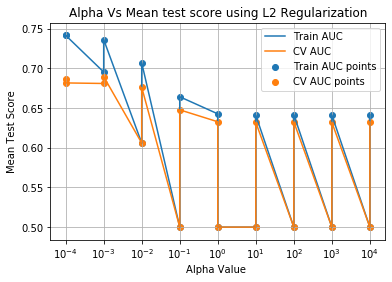

In [ ]:
#Ploting the AUC curve to find the best Alpha
results = pd.DataFrame.from_dict(model.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha = results['param_alpha']

fig, ax = plt.subplots()
ax.plot(alpha, train_auc, label='Train AUC')
ax.plot(alpha, cv_auc, label='CV AUC')

ax.scatter(alpha, train_auc, label='Train AUC points')
ax.scatter(alpha, cv_auc, label='CV AUC points')
ax.set_xscale('log')
ax.set_xticks([10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10** 4])
ax.set_xlabel("Alpha Value ")
ax.set_ylabel("Mean Test Score")
ax.set_title("Alpha Vs Mean test score using L2 Regularization")
ax.grid()
ax.legend()

#print the best hyperparameter
print("Model Hyperparameters:",model.best_params_)

**Test Data**

Accuracy Score:  0.8382666666666667

Confusion matrix:
[[   18  2384]
 [   42 12556]]



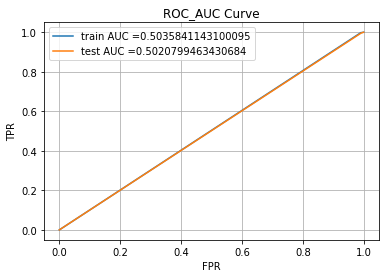

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import  roc_curve,auc
from sklearn.calibration import CalibratedClassifierCV

model = SGDClassifier(alpha=0.001,class_weight="balanced",loss='log',random_state=5,penalty='l2')
clf = CalibratedClassifierCV(model,cv=3)
clf.fit(X_train,train_label)
y_predict =  clf.predict(X_test)
print("Accuracy Score: ",accuracy_score(test_label,y_predict))
print()
print("Confusion matrix:")
print(confusion_matrix(test_label,y_predict))
print()

y_train_pred = clf.predict(X_train)    
y_test_pred = clf.predict(X_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(train_label, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(test_label, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC Curve")
plt.grid()
plt.show()

## **SET 5: Only Numerical and Categorical Features (NO TEXT FEATURES)**

In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train = hstack((train_school_state_OHE,train_teacher_prefix_OHE,train_project_grade_category_OHE,train_clean_categories_OHE,
                  train_clean_subcategories_OHE,train_norm_price,train_norm_prev_posted_proj)).tocsr()

X_test = hstack((test_school_state_OHE, test_teacher_prefix_OHE,test_project_grade_category_OHE,test_clean_categories_OHE,test_clean_subcategories_OHE,
                 X_test_norm_price,X_test_norm_prev_posted_proj)).tocsr()

print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)

X_train:  (35000, 101)
X_test:  (15000, 101)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

alpha_val =[10**x for x in range(-4,5)]
print(alpha_val)
#Logistic Regression 
params= {"alpha":alpha_val,
         "class_weight":["balanced"],
         "penalty":['l1','l2'],
         "loss":["log"],
        }
clf = SGDClassifier(n_jobs=-1)
model = GridSearchCV(clf,param_grid=params,verbose=1,return_train_score=True,scoring="roc_auc")
model.fit(X_train,train_label)

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    3.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=-1,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000],
                         'class_weight': ['balanced'], 'loss': ['log'],
  

{'alpha': 0.01, 'class_weight': 'balanced', 'loss': 'log', 'penalty': 'l2'}

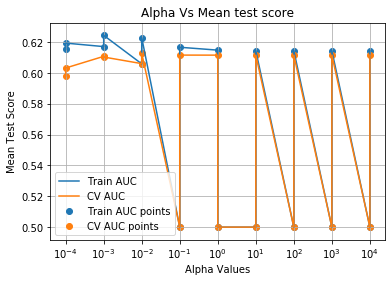

In [ ]:
#Ploting the AUC curve to find the best Alpha
results = pd.DataFrame.from_dict(model.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha = results['param_alpha']

fig, ax = plt.subplots()
ax.plot(alpha, train_auc, label='Train AUC')
ax.plot(alpha, cv_auc, label='CV AUC')

ax.scatter(alpha, train_auc, label='Train AUC points')
ax.scatter(alpha, cv_auc, label='CV AUC points')
ax.set_xscale('log')
ax.set_xticks([10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10** 4])
ax.set_xlabel("Alpha Values")
ax.set_ylabel("Mean Test Score")
ax.set_title("Alpha Vs Mean test score")
ax.grid()
ax.legend()

#print the best hyperparameter
model.best_params_

Accuracy: 0.8389333333333333

Confusion Matrix:
[[    6  2396]
 [   20 12578]]



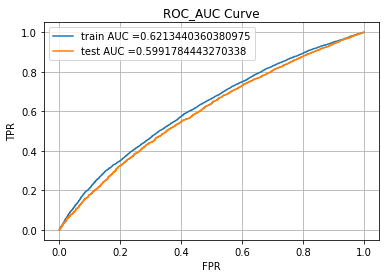

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import  roc_curve,auc

model = SGDClassifier(alpha=0.01,class_weight="balanced",loss='log',random_state=5,penalty="l2")
clf = CalibratedClassifierCV(model,cv=3)
clf.fit(X_train,train_label)
y_predict =  clf.predict(X_test)

print("Accuracy:",accuracy_score(test_label,y_predict))
print()
print("Confusion Matrix:")
print(confusion_matrix(test_label,y_predict))
print()

y_train_pred = clf.predict_proba(X_train)    
y_test_pred = clf.predict_proba(X_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(train_label, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(test_label, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC Curve")
plt.grid()
plt.show()

## **Summary Table**

In [ ]:
from prettytable import PrettyTable    
x = PrettyTable()

x.field_names = ["Set No.", "Vectorizer", "Best Alpha", "AUC score"]

x.add_row(["Model 1", "BOW", 0.01, 0.714])
x.add_row(["Model 2", "Tfidf", 0.0001, 0.718])
x.add_row(["Model 3", "Glove:W2V", 0.0001, 0.697])
x.add_row(["Model 4", "Avg W2v", 0.001, 0.501])
x.add_row(["Model 5", "Tfidf w/o Text", 10, 0.6007])

print(x)


+---------+----------------+------------+-----------+
| Set No. |   Vectorizer   | Best Alpha | AUC score |
+---------+----------------+------------+-----------+
| Model 1 |      BOW       |    0.01    |   0.714   |
| Model 2 |     Tfidf      |   0.0001   |   0.718   |
| Model 3 |   Glove:W2V    |   0.0001   |   0.697   |
| Model 4 |    Avg W2v     |   0.001    |   0.501   |
| Model 5 | Tfidf w/o Text |     10     |   0.6007  |
+---------+----------------+------------+-----------+
